Prediction of Diabetes Empowered with Fused Machine Learning


Project by Analyst Himanshu Mittal





In [ ]:

import numpy as np # linear algebra
import pandas as d # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')


Importing the data set as data frame df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = d.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df #displaying the dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df = df.rename(columns= {"DiabetesPedigreeFunction": "DPF"})

A huge revealing mistake in the dataset is that there are many 0 values for things which actually can't be 0.
These are:

1. **Glucose**
2.   **Blood Pressre**
3.   **Skin Thickness**
4.   **Insulin**
5.   **BMI**

Replace these values with NaN.

In [ ]:
#for changing values inside the dataset, we need to make a copy of the dataset and
#replace the values.

df = df.copy(deep = True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

Now we fill these NaNs with some number appropriate to the dataset.

In [ ]:
df["Glucose"].fillna(df["Glucose"].median(), inplace= True)
df["BloodPressure"].fillna(df["BloodPressure"].median(), inplace= True)
df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace= True)
df["Insulin"].fillna(df["Insulin"].median(), inplace= True)
df["BMI"].fillna(df["BMI"].median(), inplace= True)

<Axes: >

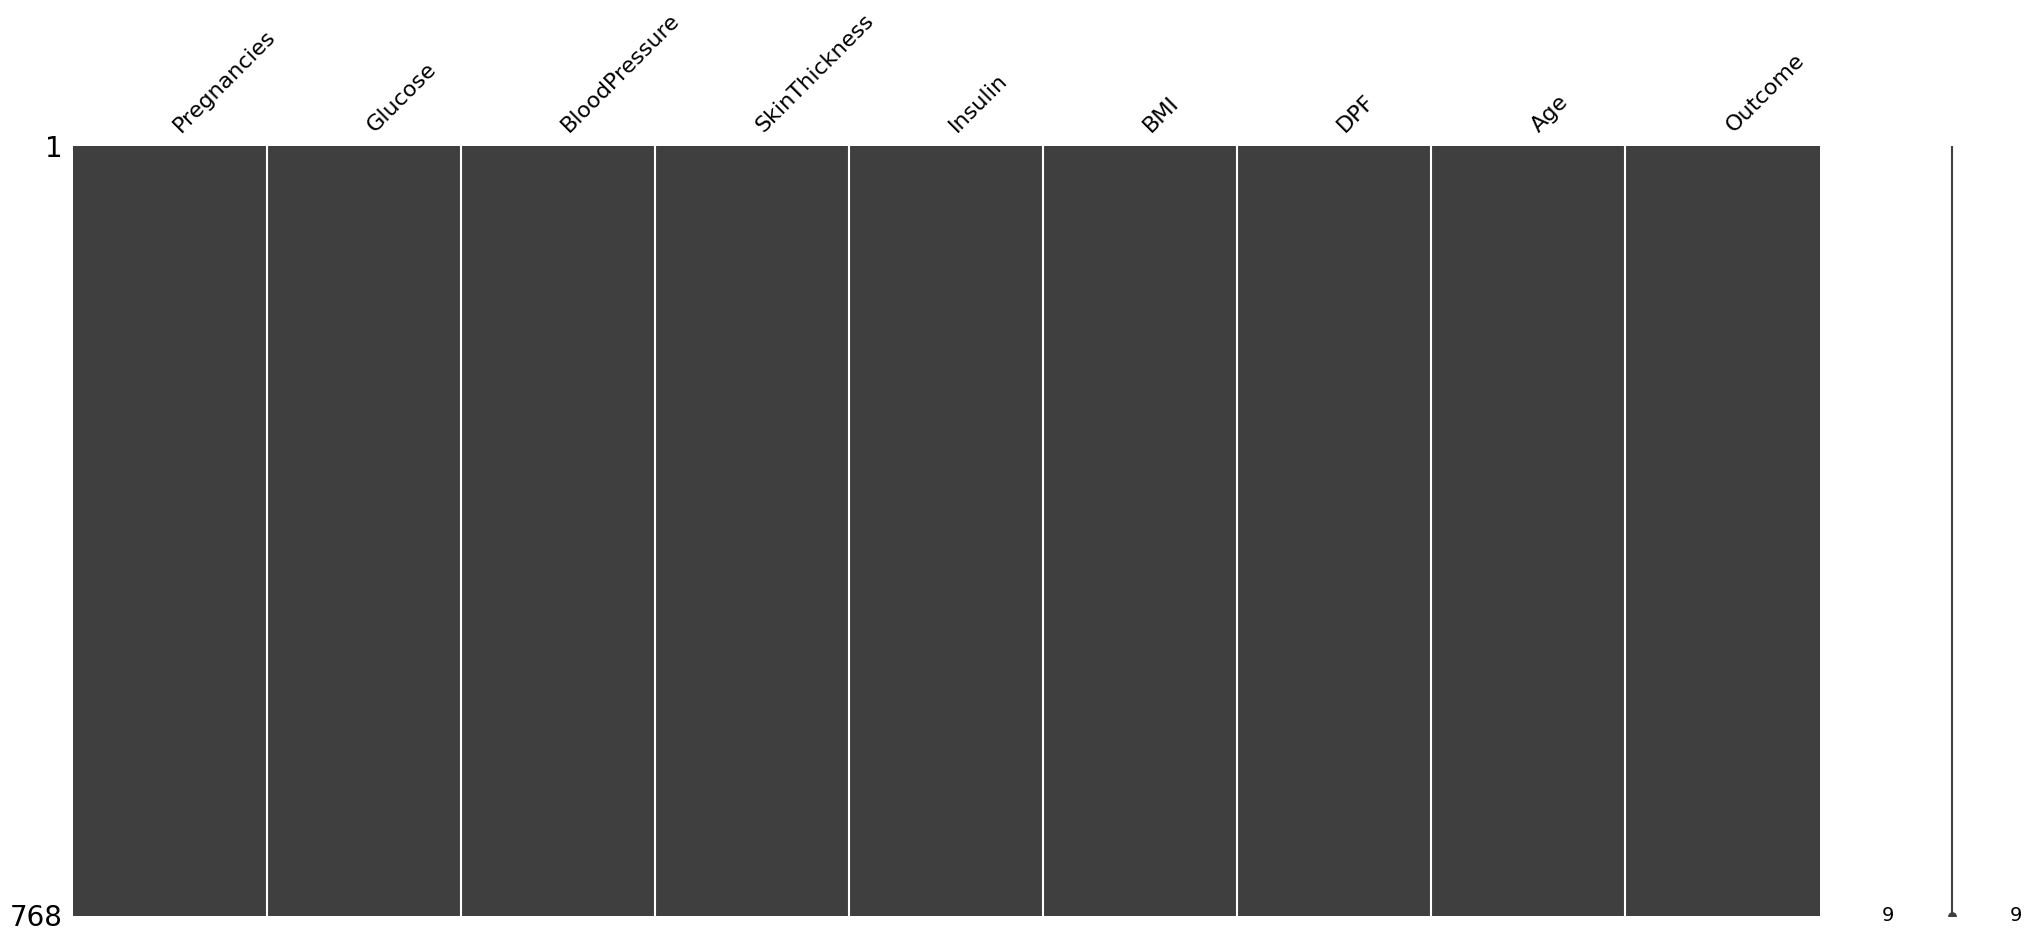

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0              6    148.0           72.0           35.0    125.0  33.6  0.627   
1              1     85.0           66.0           29.0    125.0  26.6  0.351   
2              8    183.0           64.0           29.0    125.0  23.3  0.672   
3              1     89.0           66.0           23.0     94.0  28.1  0.167   
4              0    137.0           40.0           35.0    168.0  43.1  2.288   
..           ...      ...            ...            ...      ...   ...    ...   
763           10    101.0           76.0           48.0    180.0  32.9  0.171   
764            2    122.0           70.0           27.0    125.0  36.8  0.340   
765            5    121.0           72.0           23.0    112.0  26.2  0.245   
766            1    126.0           60.0           29.0    125.0  30.1  0.349   
767            1     93.0           70.0           31.0    125.0  30.4  0.315   

     Age  Outcome  
0     50        1  
1     31        0  
2     32        1  
3     21        0  
4     33        1  
..   ...      ...  
763   63        0  
764   27        0  
765   30        0  
766   47        1  
767   23        0  

[768 rows x 9 columns]

<Axes: xlabel='Outcome', ylabel='count'>

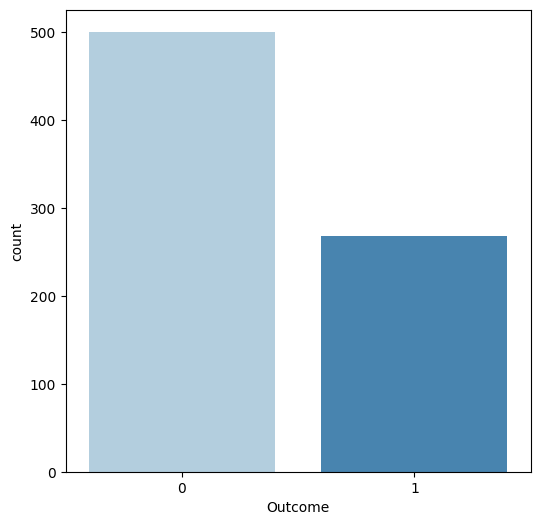

In [ ]:
plt.figure(figsize= (6, 6))
sns.countplot(data= df, x= "Outcome", palette= "Blues")

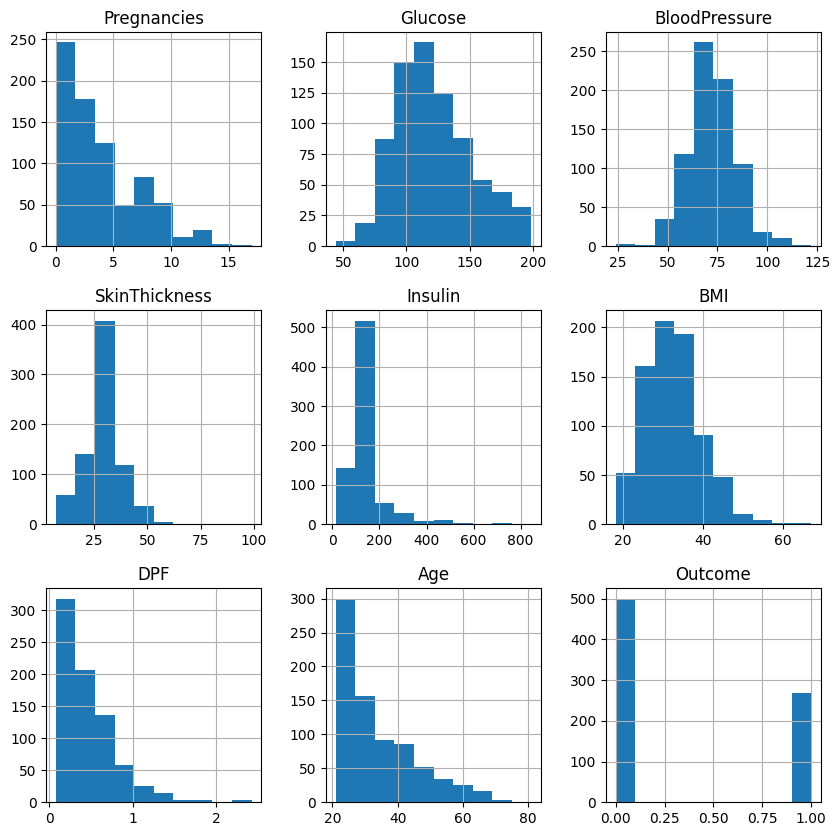

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='DPF'>

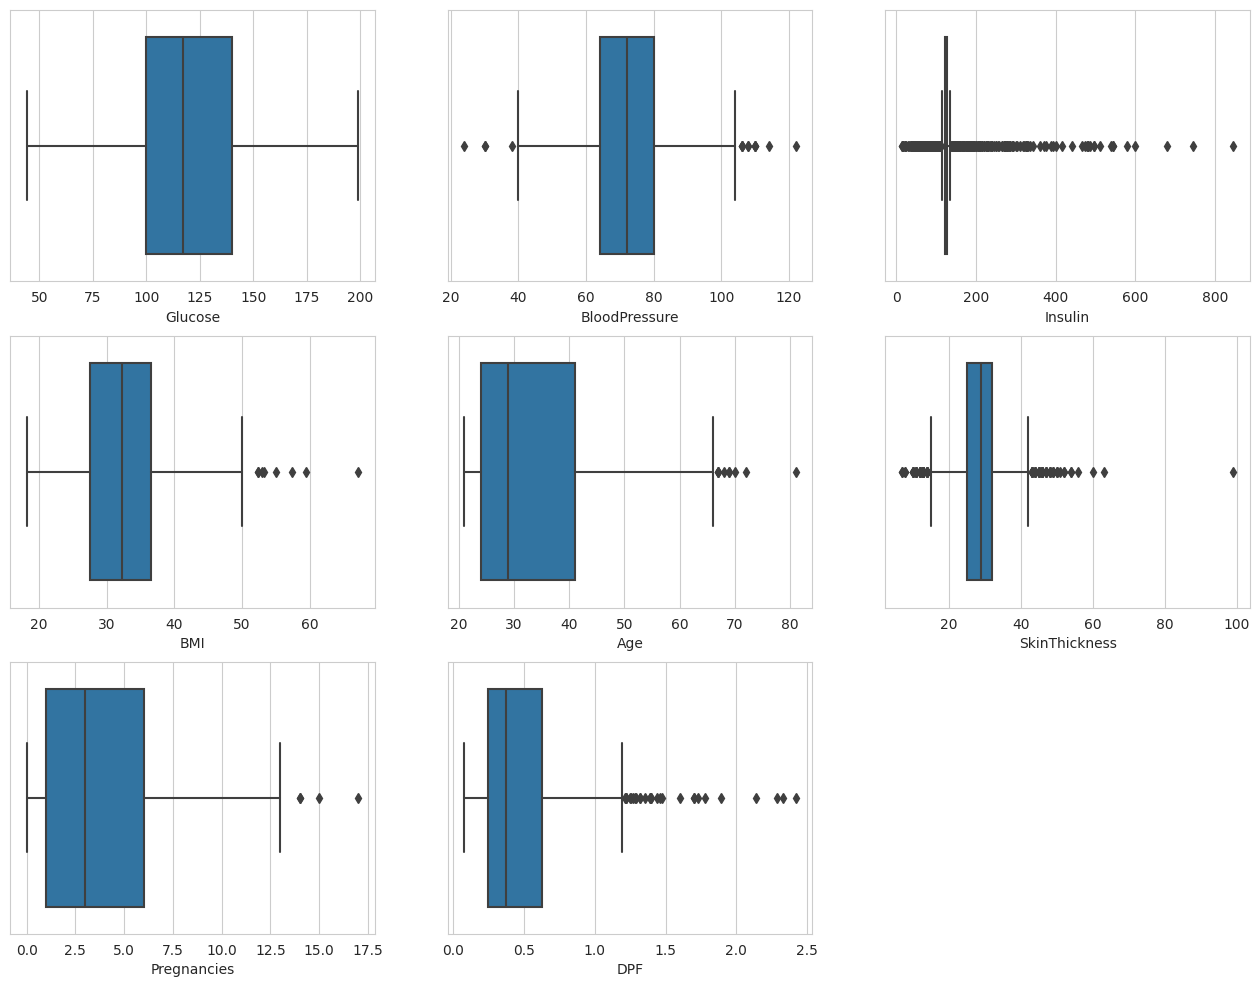

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DPF',data=df)

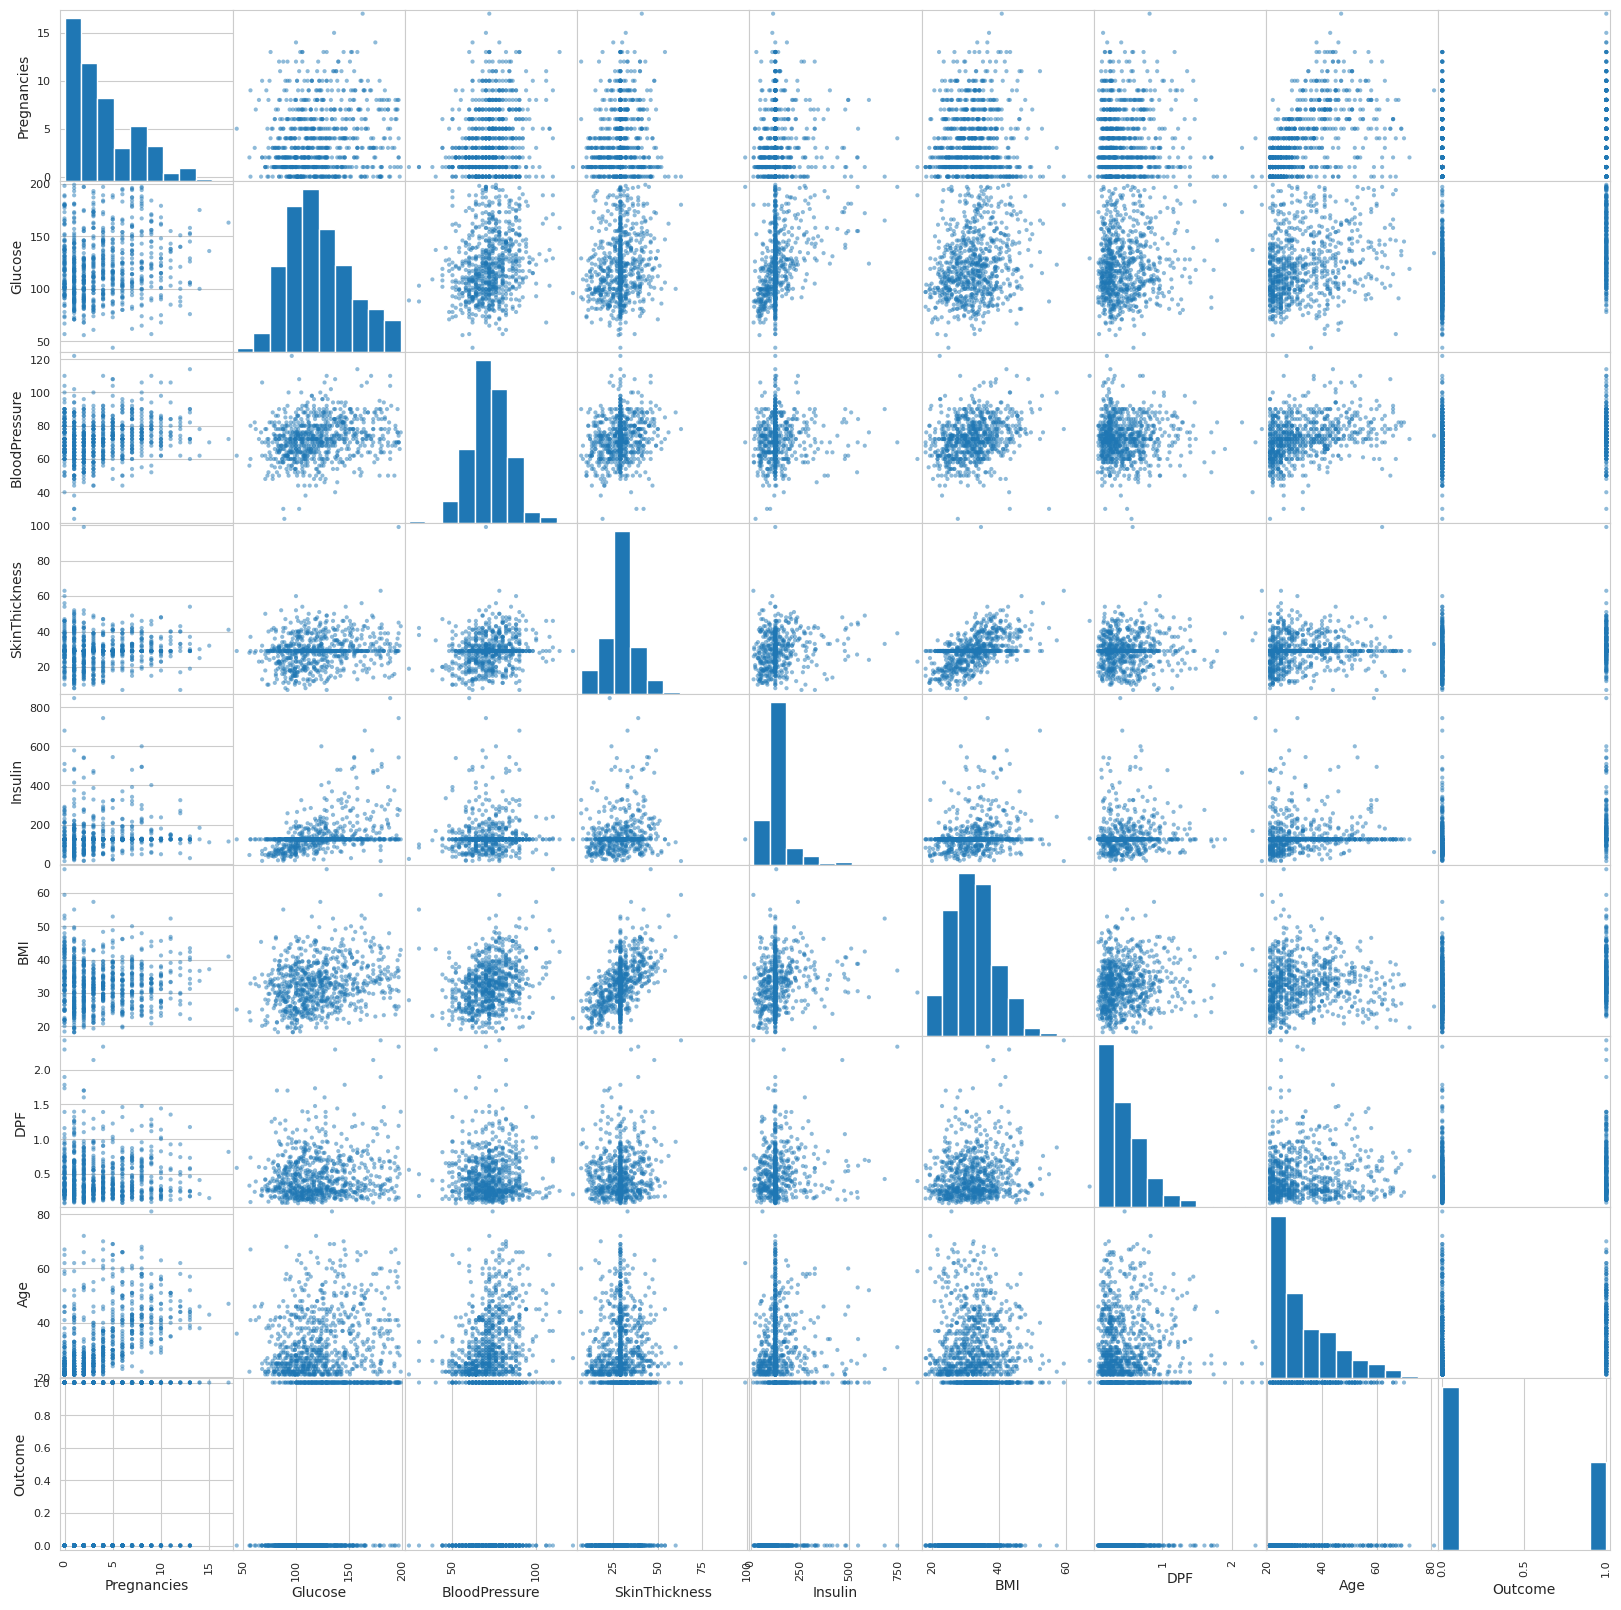

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

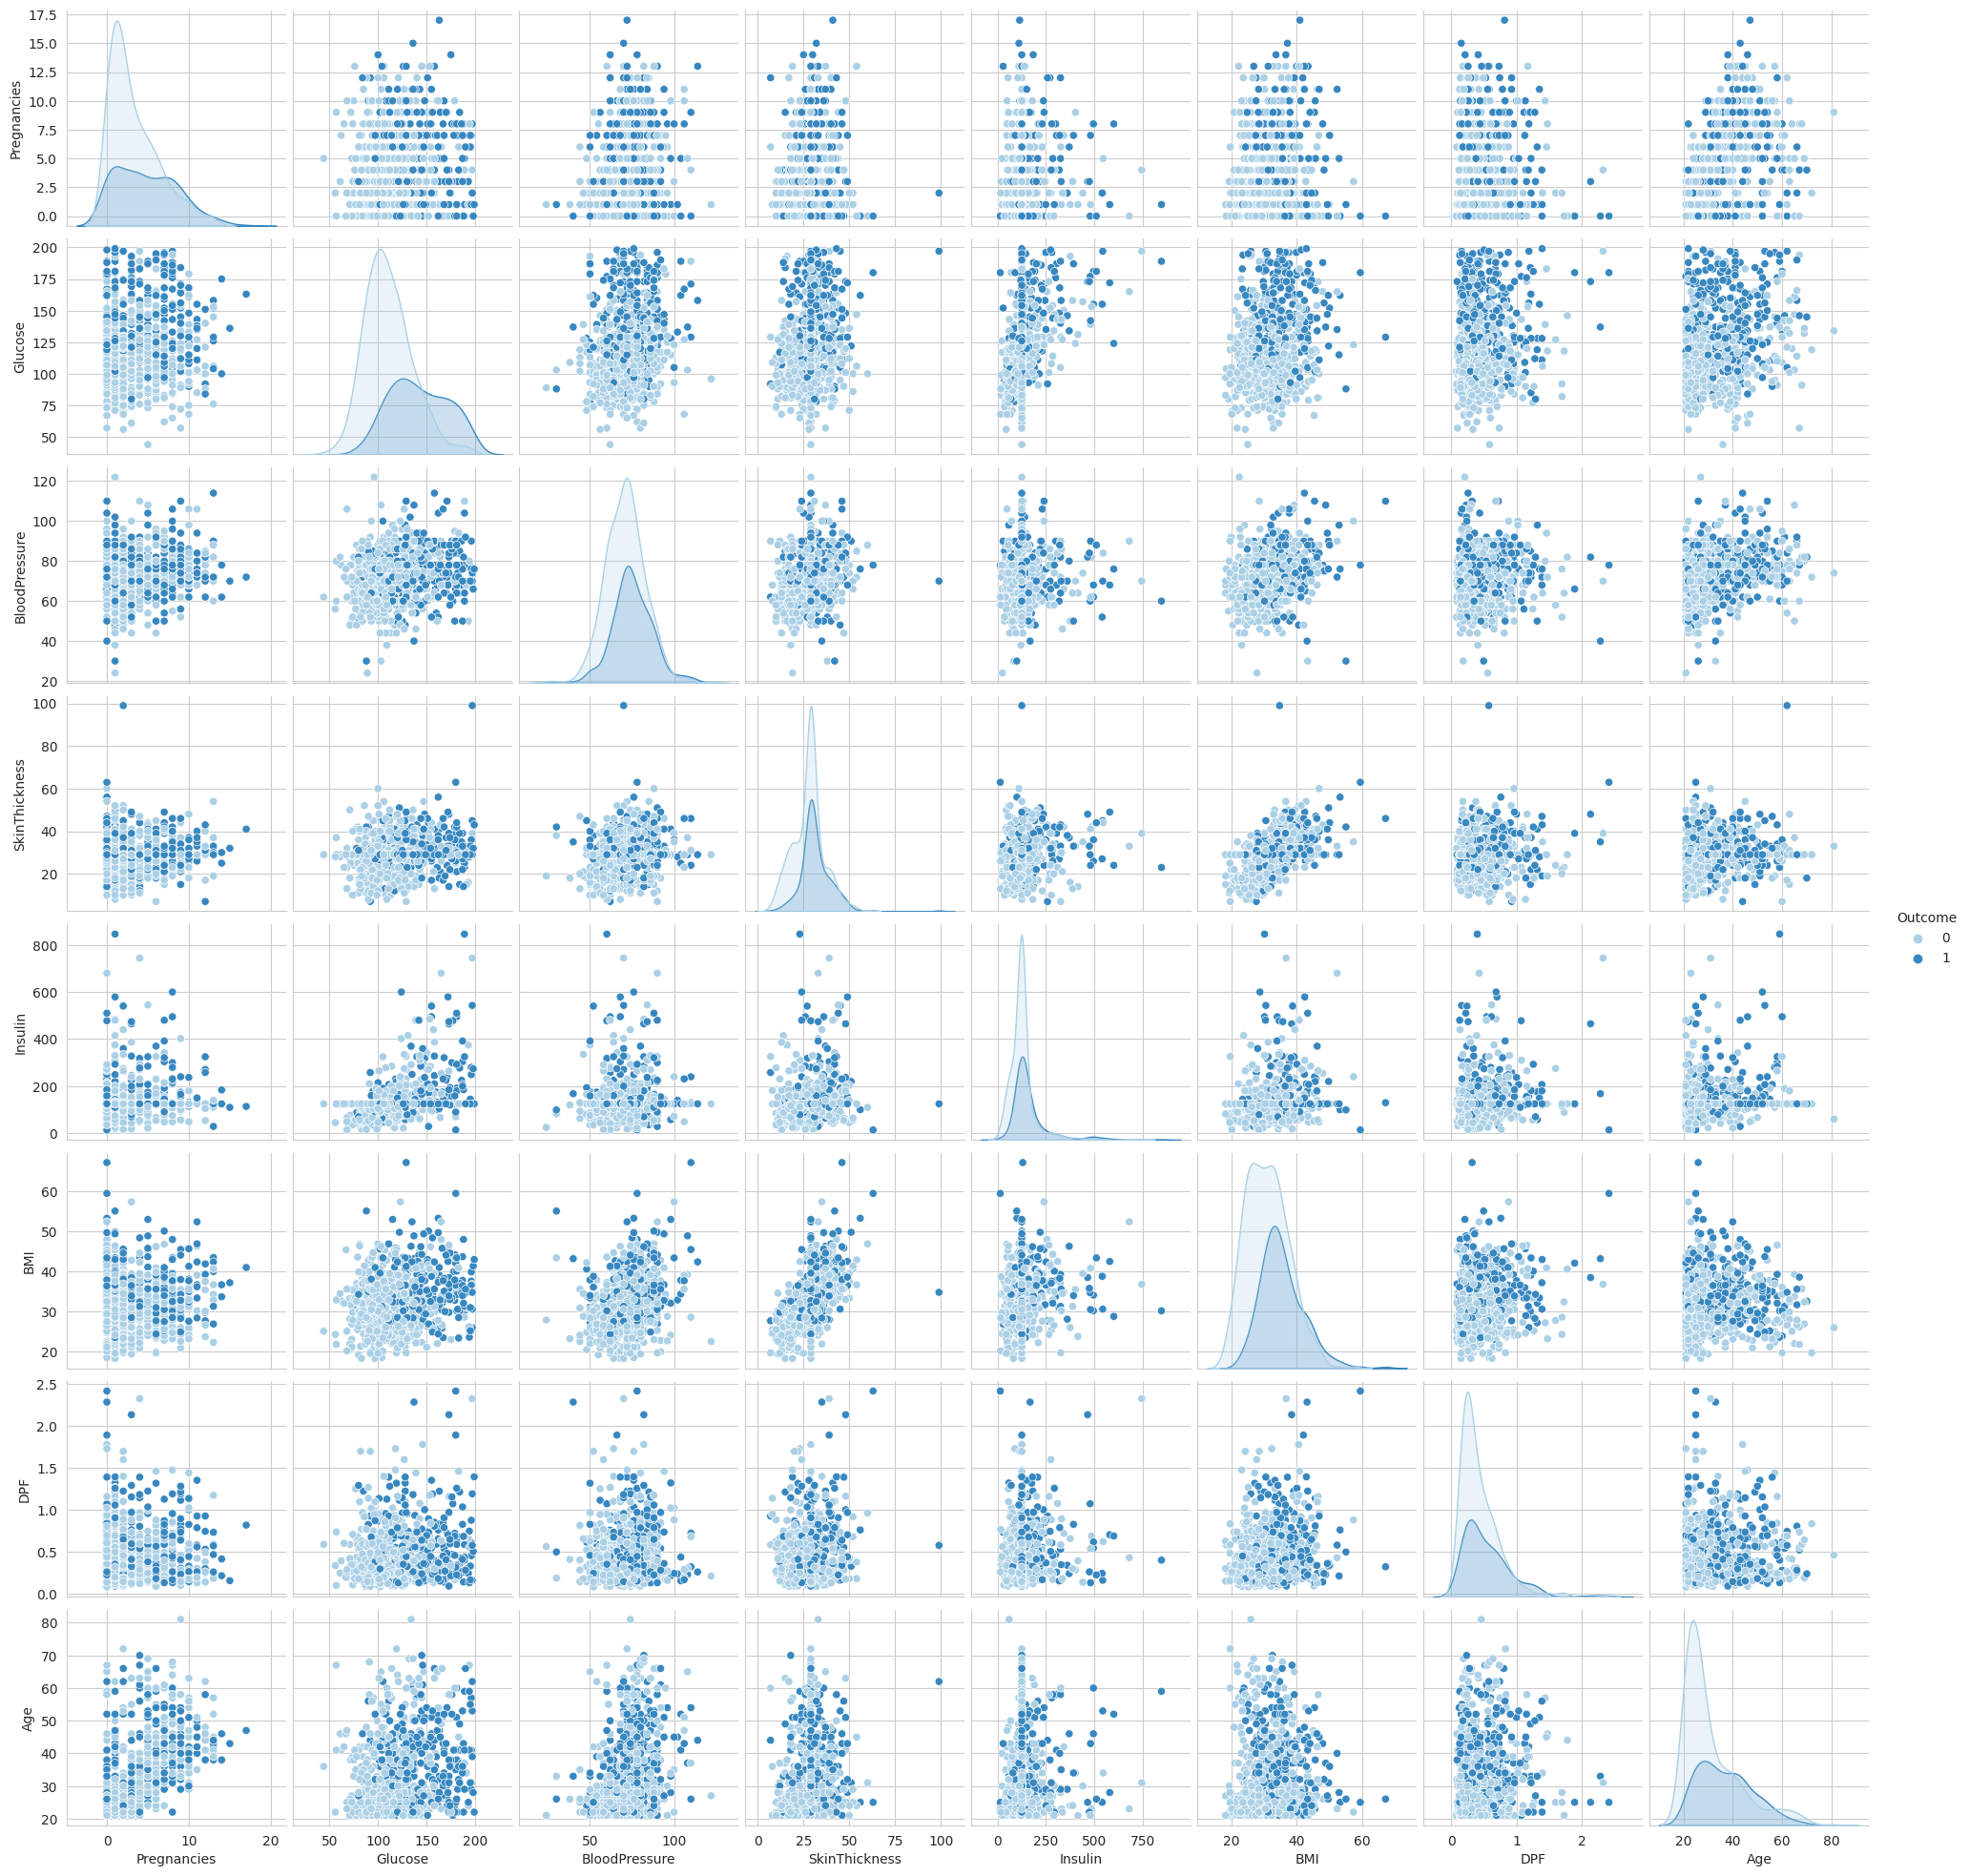

In [ ]:
sns.pairplot(data= df, hue= "Outcome", palette= "Blues")

<Axes: >

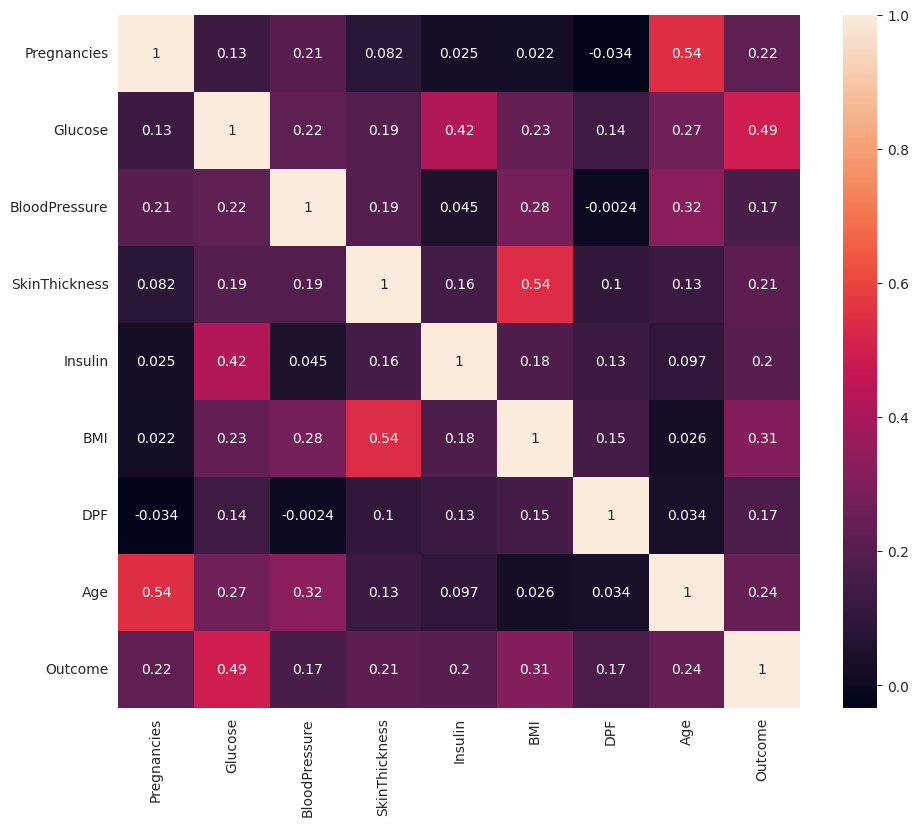

In [ ]:
plt.subplots(figsize=(11,9))
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [ ]:
atName = [name for name in df.loc[:, :"Age"].columns]

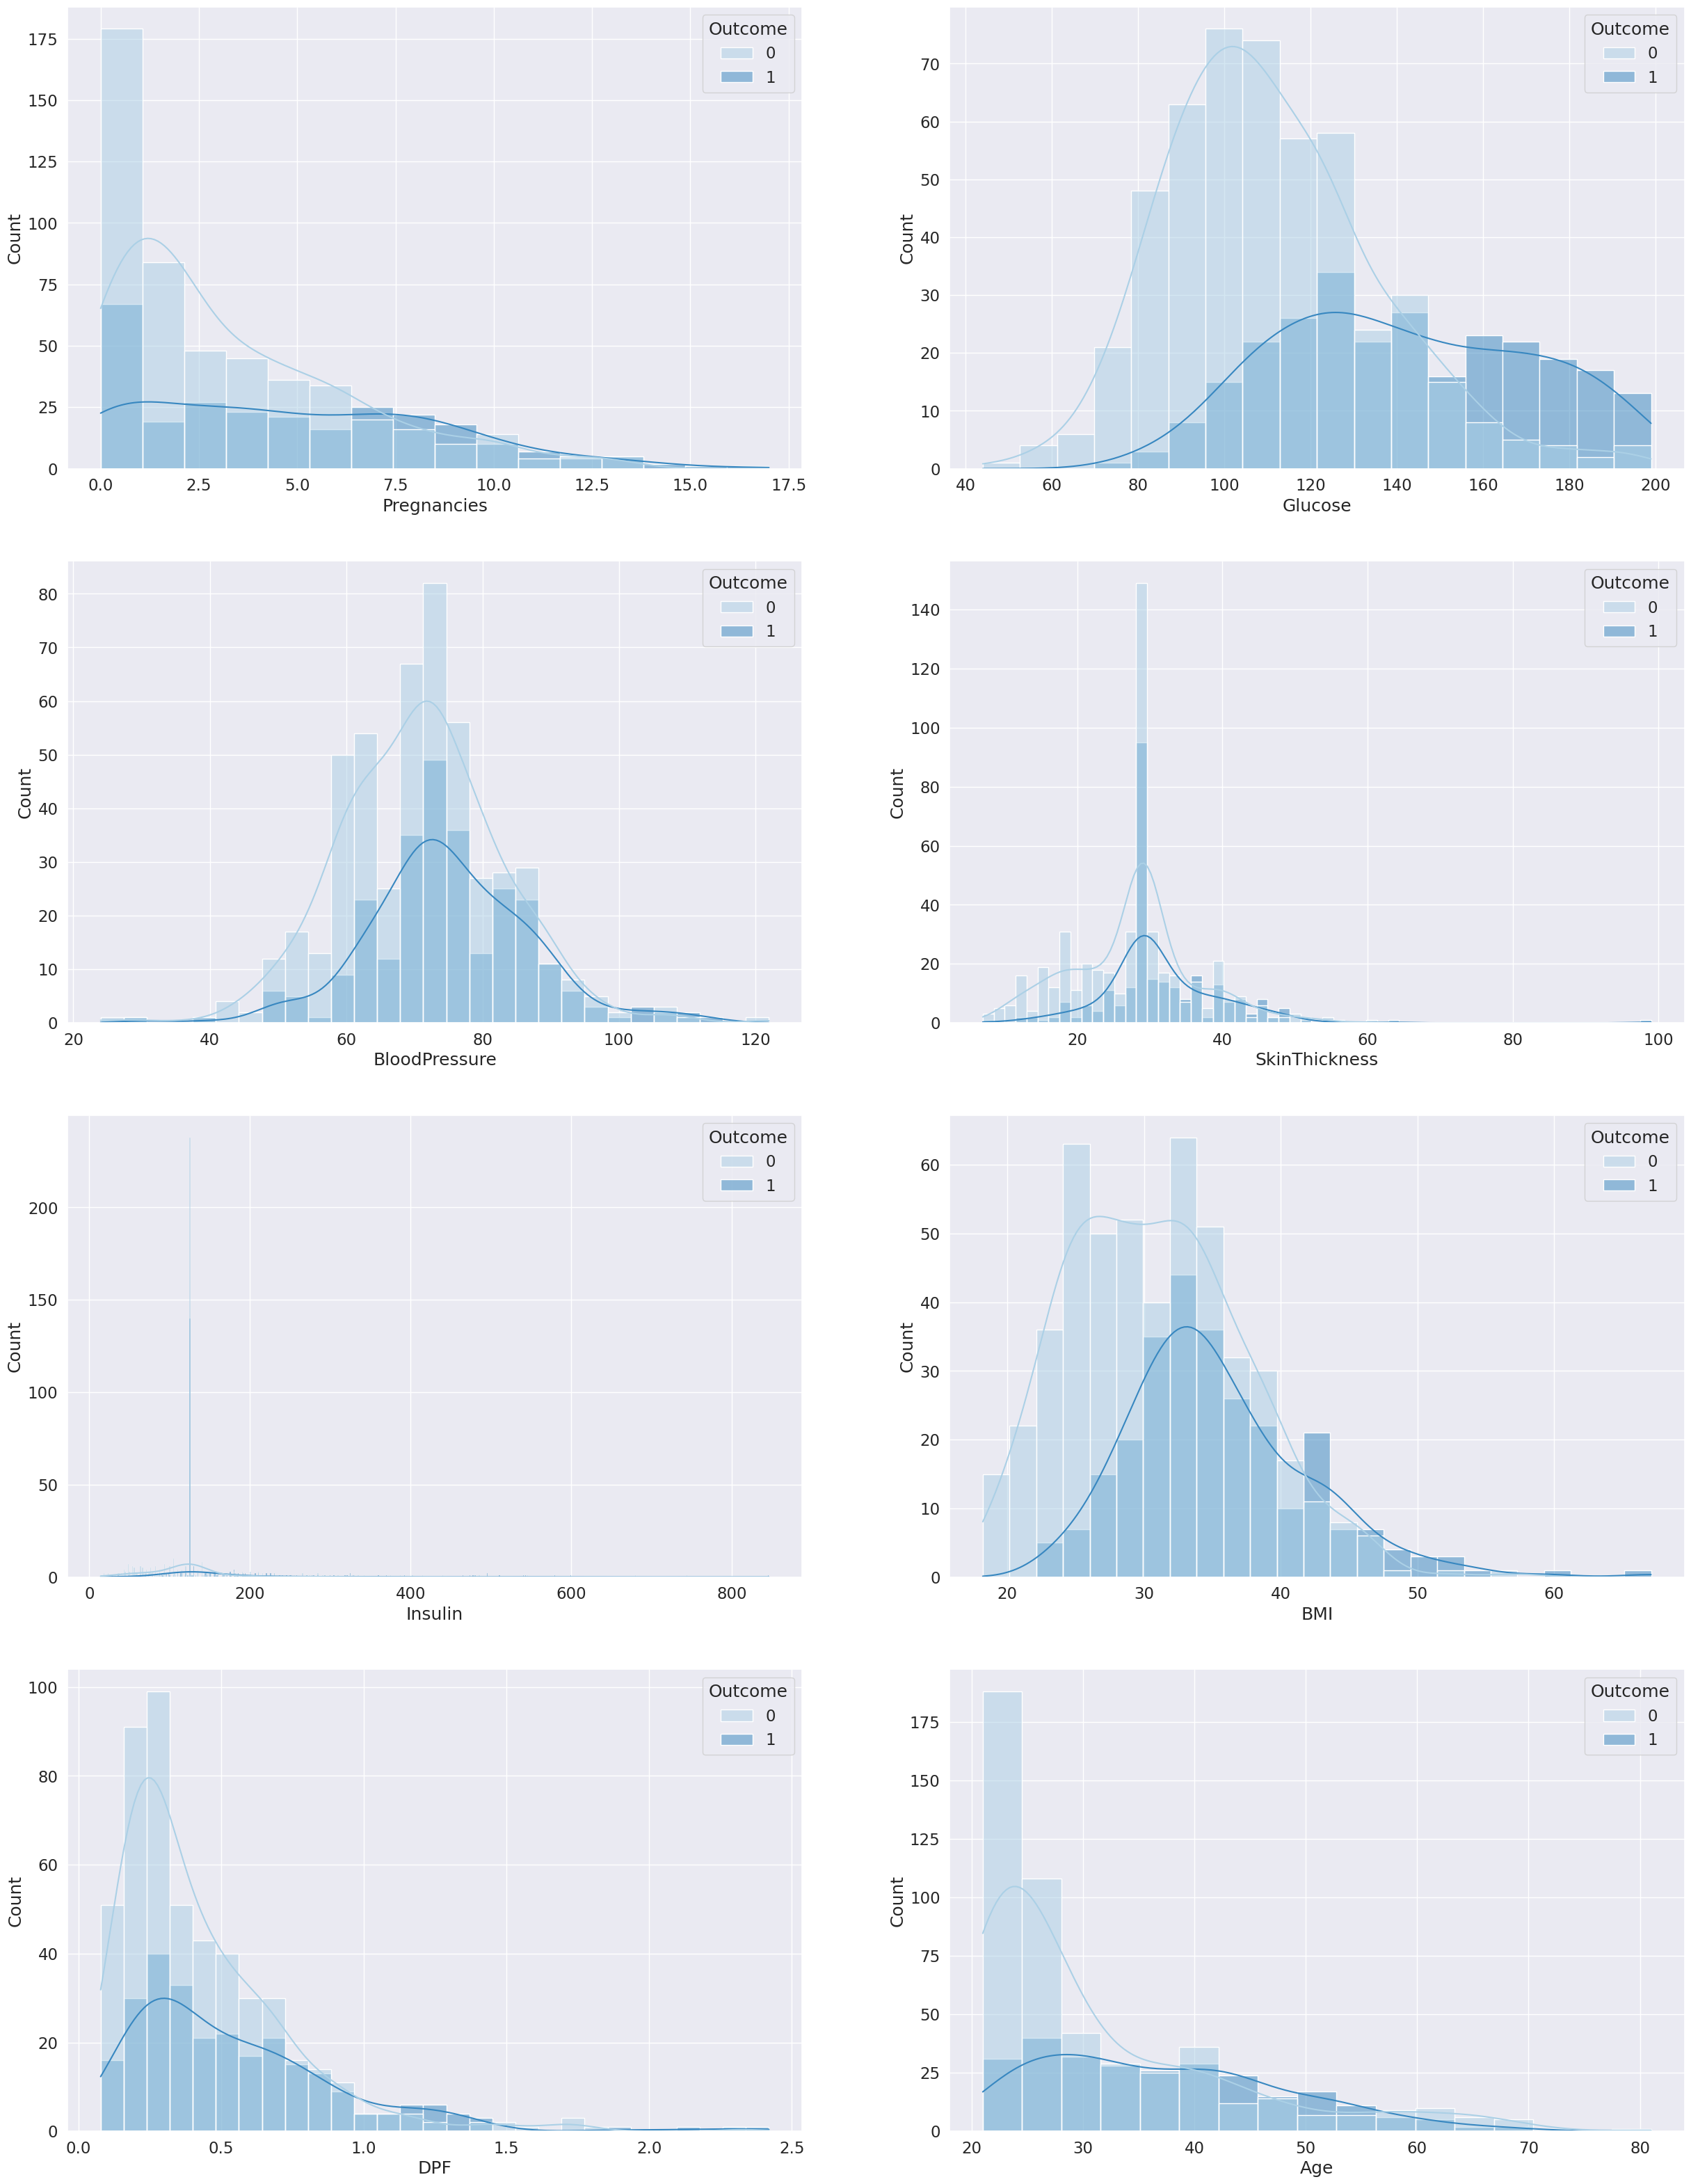

In [ ]:
plt.figure(figsize= (30, 50))
i = 1
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
for name in atName:
  plt.subplot(5, 2, i)
  sns.histplot(data= df, x= name, hue= "Outcome", kde= True, palette= "Blues")
  i = i + 1

In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["Glucose"])) < 3)]

In [ ]:
Outcome1 = testData[testData["Outcome"] == 1]["Glucose"]
Outcome0 = testData[testData["Outcome"] == 1]["Glucose"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-0.03730133907263841
0.9702823185441043
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["BloodPressure"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["BloodPressure"]
Outcome0 = testData[testData["Outcome"] == 1]["BloodPressure"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-0.061942067061096895
0.9506714936757577
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["Pregnancies"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["Pregnancies"]
Outcome0 = testData[testData["Outcome"] == 1]["Pregnancies"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

0.15937659179297917
0.8735347409745804
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["SkinThickness"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["SkinThickness"]
Outcome0 = testData[testData["Outcome"] == 1]["SkinThickness"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

0.0
1.0
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["Insulin"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["Insulin"]
Outcome0 = testData[testData["Outcome"] == 1]["Insulin"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

0.552259241444131
0.5814067707319495
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["BMI"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["BMI"]
Outcome0 = testData[testData["Outcome"] == 1]["BMI"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-1.133729513861947
0.2582831803939618
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["DPF"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["DPF"]
Outcome0 = testData[testData["Outcome"] == 1]["DPF"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-0.003909707359393016
0.9968844493118811
We failed to reject the null hypothesis.


In [ ]:
import random
from scipy import stats
testData = df[(np.abs(stats.zscore(df["Age"])) < 3)]

Outcome1 = testData[testData["Outcome"] == 1]["Age"]
Outcome0 = testData[testData["Outcome"] == 1]["Age"]

Outcome1 = Outcome1.values.tolist()
Outcome1 = random.sample(Outcome1, 100)
Outcome0 = Outcome0.values.tolist()
Outcome0 = random.sample(Outcome0, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(Outcome1, Outcome0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

-0.19249381757215608
0.8475551337750797
We failed to reject the null hypothesis.


In [ ]:
#we failed to reject any of the attributes

In [ ]:
#scaling
#cut the data in dependent and independent variables.
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
#we will use standardisation for this dataset.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0, stratify= y)
#splitting data in 80% train, 20%test
#stratify makes sure that the split of the categorical variables remains the same.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(x_train,y_train)

In [ ]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 21


In [ ]:
#Predict testing set
knn_pred = best_model.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.6326530612244898

 Precision score is:
 0.7045454545454546

 Recall score is:
 0.5740740740740741

 Confusion Matrix:



<Axes: >

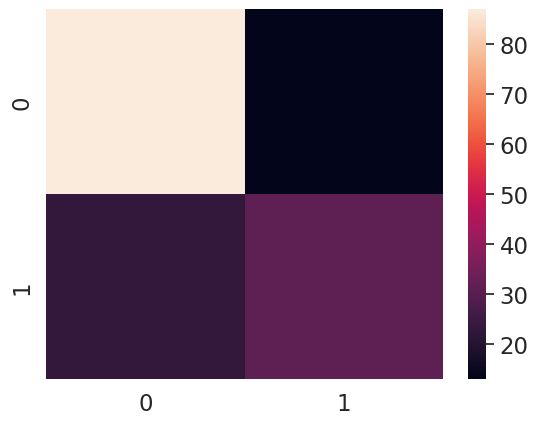

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
nb_pred=best_model.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154


 F1:
 0.606060606060606

 Precision score is:
 0.6666666666666666

 Recall score is:
 0.5555555555555556

 Confusion Matrix:



<Axes: >

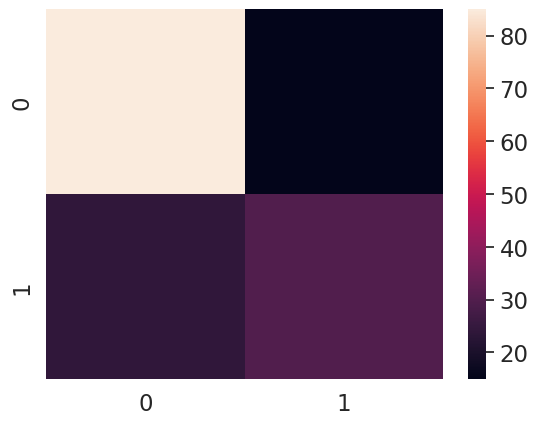

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']


In [ ]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(x, y)

In [ ]:
svm_pred=grid_result.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154


 F1:
 0.6326530612244898

 Precision score is:
 0.7045454545454546

 Recall score is:
 0.5740740740740741

 Confusion Matrix:



<Axes: >

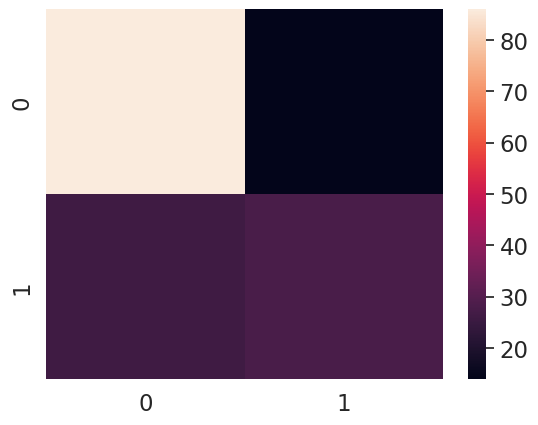

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [ ]:
dt_pred=best_model.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.7037037037037037

 Precision score is:
 0.7037037037037037

 Recall score is:
 0.7037037037037037

 Confusion Matrix:



<Axes: >

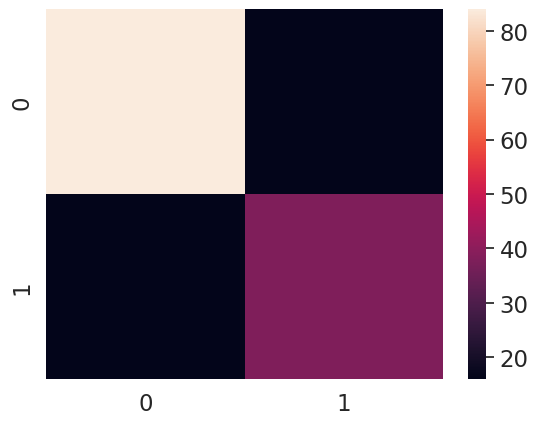

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
best_model = grid_search.fit(x_train, y_train)

In [ ]:
rf_pred=best_model.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       100
           1       0.76      0.63      0.69        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154


 F1:
 0.6326530612244898

 Precision score is:
 0.7045454545454546

 Recall score is:
 0.5740740740740741

 Confusion Matrix:



<Axes: >

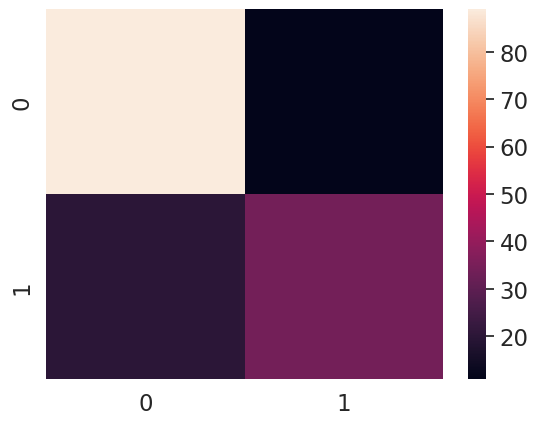

In [ ]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_pred=reg.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154


 F1:
 0.6236559139784946

 Precision score is:
 0.7435897435897436

 Recall score is:
 0.5370370370370371

 Confusion Matrix:



<Axes: >

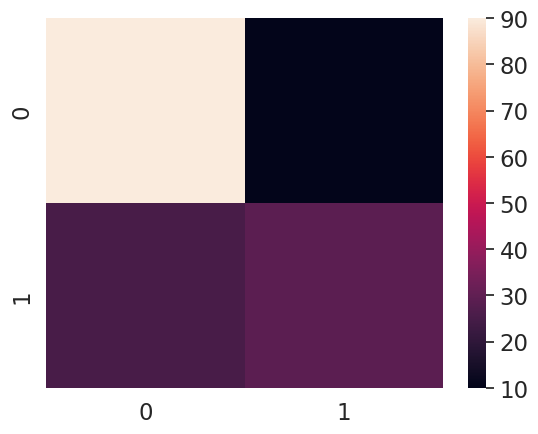

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_test.shape

(154, 8)

In [ ]:
y_test.shape


(154,)

In [ ]:
x.shape


(768, 8)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='softmax'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


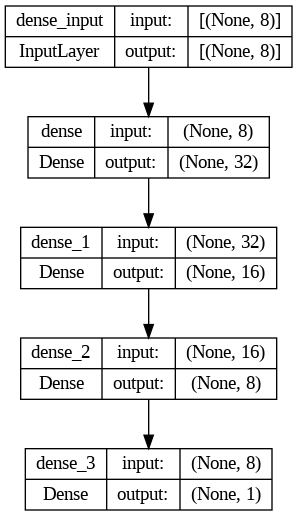

In [ ]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='nn_model_plot.png')

In [ ]:
hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

Epoch 1/100
20/20 [==============================] - 2s 19ms/step - loss: 0.2444 - accuracy: 0.6515 - val_loss: 0.2376 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.6515 - val_loss: 0.2267 - val_accuracy: 0.6494
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2233 - accuracy: 0.6515 - val_loss: 0.2174 - val_accuracy: 0.6494
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.6515 - val_loss: 0.2087 - val_accuracy: 0.6494
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2062 - accuracy: 0.6515 - val_loss: 0.1995 - val_accuracy: 0.6558
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1969 - accuracy: 0.6612 - val_loss: 0.1903 - val_accuracy: 0.6818
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1879 - accuracy: 0.7166 - val_loss: 0.1812 - val_accuracy: 0.7338
Epoch 8/100


In [ ]:
# Train and Test accuracy
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.7997
Training Accuracy: 79.97%

5/5 [==============================] - 0s 4ms/step - loss: 0.1391 - accuracy: 0.7857
Testing Accuracy: 78.57%



In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)


5/5 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85 15]
 [18 36]]


0.7857142857142857

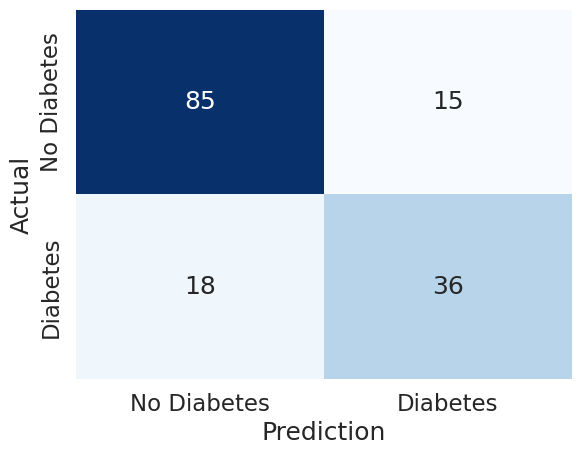

In [ ]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
acc = hist.history['accuracy']
loss = hist.history['loss']

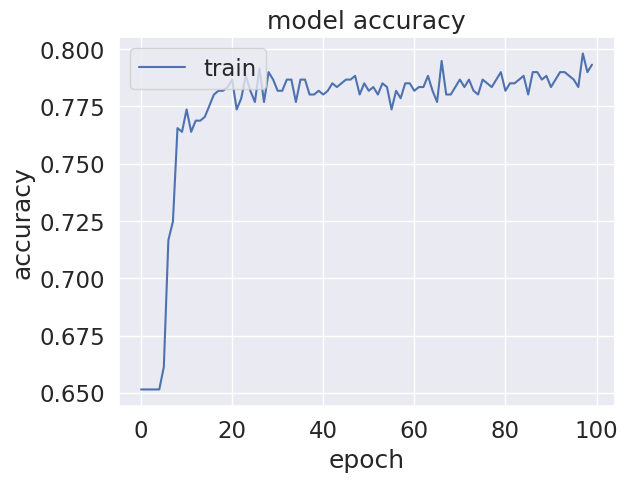

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

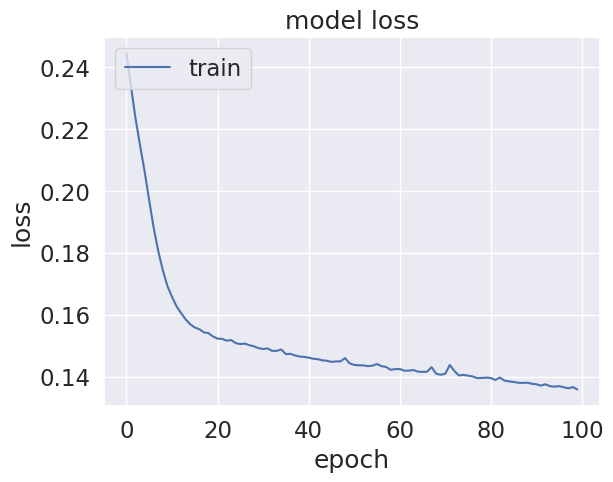

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')
